## ASSIGNMENT-1: Transformations, Mapping and Data Representations

Roll number: 2021111027

### Instructions
 * Fill in the roll-number in the cell above.
 * Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
 * All the code and result files should be uploaded in the github classroom.
 * For this assignment, you will be using Open3D and AI2Thor extensively. Refer to [Open3D](http://www.open3d.org/docs/release/) and [AI2Thor](https://github.com/allenai/ai2thor) documentation.
 *  Most of the questions require you to **code your own functions** unless there is a need to call in the abilities of the mentioned libraries, such as Visualisation from Open3D. Make sure your code is modular since you will be reusing them for future assignments. All the functions related to transformation matrices, quaternions, and 3D projection are expected to be coded by you.
 *  All the representations are expected to be in a right-hand coordinate system.
<!--  * Answer to the descriptive questions should be answered in your own words. Copy-paste answers will lead to penalty. -->
 * You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.
 * All the visualization should be done inside the notebook unless specified otherwise.
 * Plagiarism will lead to heavy penalty.
 * Commit this notebook in the repo and any other results files under the result folder in the GitHub Classroom repo. 
 * Commits past the deadline will not be considered.

In [8]:
# List the imports here
import os
import time
import copy
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

from numpy import cos, sin
from pynput import keyboard
from datetime import datetime
from pynput.keyboard import Key
from scipy.optimize import fsolve
from ai2thor.controller import Controller

### SECTION 1: Transformations and representations

#### 1.1 Euler angles

a. Write a function that returns a rotation matrix given the angles (𝛼, 𝛽, 𝛾) = (π/6, 7π/18, 2π/9) in radians (X-Y-Z). Do not use inbuilt functions.

b. Solve for angles using fsolve from scipy for three initializations of your choice and compare.
$$M(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0.72907076 & -0.56745855 & 0.38268343 \\0.64785386 & 0.39180184 & -0.65328148 \\
    0.22077409 & 0.72421137 & 0.65328148\end{array}\right] 
$$

c. Show an example where a Gimbal lock occurs and visualize the Gimbal lock on the given point cloud, data/toothless.ply. You have to show the above by animation (rotation along each axis one by one).

Hint: Use Open3D's non-blocking visualization and discretize the rotation to simulate the animation. For example, if you want to rotate by 20° around a particular axis, do so in increments of 5° 4 times to make it look like an animation.

In [9]:
##############################################################################
# TODO: Do tasks described in 1.1 (a)
##############################################################################

def rotMatrix(angles):
    alpha, beta, gamma = angles[0], angles[1], angles[2]
    
    R_x_alpha = np.array([
        [1, 0, 0],
        [0, cos(alpha), -sin(alpha)],
        [0, sin(alpha),  cos(alpha)]
    ])

    R_y_beta = np.array([
        [cos(beta),  0, sin(beta)],
        [0, 1, 0],
        [-sin(beta), 0, cos(beta)]
    ])

    R_z_gamma = np.array([
        [cos(gamma), -sin(gamma), 0],
        [sin(gamma),  cos(gamma), 0],
        [0, 0, 1]
    ])

    R = R_z_gamma @ R_y_beta @ R_x_alpha
    return R

angles = [np.pi / 6, (7 * np.pi) / 18, (2 * np.pi) / 9]
rotationMatrix = rotMatrix(angles)
print(rotationMatrix)

##############################################################################
# END OF YOUR CODE
##############################################################################

[[ 0.26200263 -0.19674724  0.944799  ]
 [ 0.21984631  0.96542533  0.14007684]
 [-0.93969262  0.17101007  0.29619813]]


In [10]:
##############################################################################
# TODO: Do tasks described in 1.1 (b)
##############################################################################

def eulerAngles(initial_angles):
    desired_matrix = np.array([
        [0.72907076, -0.56745855, 0.38268343],
        [0.64785386, 0.39180184, -0.65328148],
        [0.22077409, 0.72421137,  0.65328148]
    ])

    def angleCost(angles):
        return np.linalg.norm(rotMatrix(angles) - desired_matrix, axis=1)
    
    angles = fsolve(angleCost, initial_angles)
    return angles

estimate  = eulerAngles(np.array([0, 0, 0]))
estimate2 = eulerAngles(np.array([np.pi / 6, np.pi / 2, np.pi / 3]))
estimate3 = eulerAngles(np.array([np.pi / 2, np.pi / 2, (5 * np.pi) / 11]))

print(rotMatrix(estimate))
print()
print(rotMatrix(estimate2))
print()
print(rotMatrix(estimate3))

##############################################################################
# END OF YOUR CODE
##############################################################################

[[ 0.72907076 -0.56745855  0.38268344]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]

[[ 0.72907076 -0.56745855  0.38268344]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]

[[ 0.72907076 -0.56745855  0.38268344]
 [ 0.64785386  0.39180184 -0.65328148]
 [ 0.22077409  0.72421137  0.65328148]]


In [11]:
##############################################################################
# TODO: Do tasks described in 1.1 (c)
##############################################################################

point_cloud = o3d.io.read_point_cloud('data/toothless.ply')
R_facing = rotMatrix([0, np.pi, 0])
point_cloud.rotate(R_facing)

vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(point_cloud)
vis.poll_events()
vis.update_renderer()
time.sleep(1)

R = rotMatrix([np.pi / 300, 0, 0])
for _ in range(50):
    point_cloud.rotate(R)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(0.01)
time.sleep(0.5)

R = rotMatrix([0, np.pi / 100, 0])
for _ in range(50):
    point_cloud.rotate(R)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(0.01)
time.sleep(0.5)

R = rotMatrix([0, 0, -np.pi / 150])
for _ in range(50):
    point_cloud.rotate(R)
    vis.update_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(0.01)
time.sleep(1)

vis.destroy_window()

##############################################################################
# END OF YOUR CODE
##############################################################################

#### 1.2: Quaternions


a. Convert a rotation matrix to quaternion and vice versa. Do not use inbuilt libraries for this question.

b. Perform matrix multiplication of two 3×3 rotation matrices and perform the same transformation in the quaternion space. Verify if the final transformation obtained in both cases is the same.

c. Try to interpolate any given model between two rotation matrices and visualize!

In [12]:
##############################################################################
# TODO: Do tasks described in 1.2 (a)
##############################################################################

def rot2quat(rot_matrix):
    trace = np.trace(rot_matrix)
    quaternion = [1, 0, 0, 0]

    if trace != -1:
        q_0 = 0.5 * np.sqrt(1 + trace)
        q_1 = (rot_matrix[2][1] - rot_matrix[1][2]) / (4 * q_0)
        q_2 = (rot_matrix[0][2] - rot_matrix[2][0]) / (4 * q_0)
        q_3 = (rot_matrix[1][0] - rot_matrix[0][1]) / (4 * q_0)

        quaternion = [q_0, q_1, q_2, q_3]

    else:
        q_0 = 0
        q_1 = np.unique([np.sqrt(rot_matrix[0][0] / 2 + 0.5), -np.sqrt(rot_matrix[0][0] / 2 + 0.5)])
        q_2 = np.unique([np.sqrt(rot_matrix[1][1] / 2 + 0.5), -np.sqrt(rot_matrix[1][1] / 2 + 0.5)])
        q_3 = np.unique([np.sqrt(rot_matrix[2][2] / 2 + 0.5), -np.sqrt(rot_matrix[2][2] / 2 + 0.5)])

        all_quats = []
        
        for i in q_1:
            for j in q_2:
                for k in q_3:
                    all_quats.append([q_0, i, j, k])

        all_quats.sort(key=lambda x: x[:])
        quaternion = all_quats[0]

    return quaternion

def quat2rot(quaternion):
    [q_0, q_1, q_2, q_3] = quaternion
    
    rot = np.array([
        [q_0**2 + q_1**2 - q_2**2 - q_3**2, 2 * (q_1*q_2 - q_0*q_3), 2 * (q_0*q_2 + q_1*q_3)],
        [2 * (q_0*q_3 + q_1*q_2), q_0**2 - q_1**2 + q_2**2 - q_3**2, 2 * (q_2*q_3 - q_0*q_1)],
        [2 * (q_1*q_3 - q_0*q_2), 2 * (q_0*q_1 + q_2*q_3), q_0**2 - q_1**2 - q_2**2 + q_3**2]
    ])

    return rot

rot_matrix = np.array([
    [0.72907076, -0.56745855, 0.38268343],
    [0.64785386, 0.39180184, -0.65328148],
    [0.22077409, 0.72421137,  0.65328148]
    ])
quaternion = [0.8327896, 0.41351767, 0.04860452, 0.36483177]

print(rot2quat(rot_matrix))
print()
print(quat2rot(quaternion))

##############################################################################
# END OF YOUR CODE
##############################################################################

[0.8327896012799391, 0.41351766637182136, 0.04860451539955492, 0.3648317678715459]

[[ 0.72907076 -0.56745855  0.38268344]
 [ 0.64785386  0.39180183 -0.65328148]
 [ 0.22077409  0.72421138  0.65328148]]


In [13]:
##############################################################################
# TODO: Do tasks described in 1.2 (b)
##############################################################################

def quat_mul(q1, q2):
    [q_10, q_11, q_12, q_13] = [q1[0], q1[1], q1[2], q1[3]]
    [q_20, q_21, q_22, q_23] = [q2[0], q2[1], q2[2], q2[3]]
    
    q = [
        q_10*q_20 - q_11*q_21 - q_12*q_22 - q_13*q_23,
        q_10*q_21 + q_11*q_20 + q_12*q_23 - q_13*q_22,
        q_10*q_22 + q_20*q_12 + q_13*q_21 - q_11*q_23,
        q_10*q_23 + q_20*q_13 + q_11*q_22 - q_12*q_21
    ]

    return q

R_1 = np.array([
    [0.72907076, -0.56745855, 0.38268343],
    [0.64785386, 0.39180184, -0.65328148],
    [0.22077409, 0.72421137,  0.65328148]
    ])
R_2 = np.array([
    [ 0.26200263, -0.19674724, 0.944799  ],
    [ 0.21984631,  0.96542533, 0.14007684],
    [-0.93969262,  0.17101007, 0.29619813]
])

Q_1 = rot2quat(R_1)
Q_2 = rot2quat(R_2)
Q_res = quat_mul(Q_2, Q_1)

R_res = R_2 @ R_1
Q_res_fn = rot2quat(R_res)

print(Q_res)
print(Q_res_fn)

##############################################################################
# END OF YOUR CODE
##############################################################################

[0.5807898438092146, 0.5465841427500687, 0.5832295036950046, 0.1541826068991107]
[0.5807898449280798, 0.5465841385496036, 0.5832295021066567, 0.1541826049062886]


In [14]:
##############################################################################
# TODO: Do tasks described in 1.2 (c)
##############################################################################

def unit_quat(q):
    return list(q / np.linalg.norm(q))

def quat_inv(q):
    q = unit_quat(q)

    q_inv = -np.array(q)
    q_inv[0] = -q_inv[0]
    return unit_quat(q_inv)

def rot_quat(q_final, q_initial=[1, 0, 0, 0]):
    q_initial_inv = quat_inv(q_initial)
    q_final = unit_quat(q_final)

    quat_prod = quat_mul(q_final, q_initial_inv)
    quat_prod = unit_quat(quat_prod)

    quat_angle = 2 * np.arccos(quat_prod[0])
    return [quat_angle, quat_prod]

def interpolate_quat(angle, q, n_iter=50):
    angle /= 2
    angle *= (1 / n_iter)

    q[0] = 0

    if q[1:] != [0, 0, 0]:
        q = unit_quat(q)

    q = list(np.array(q) * np.sin(angle))
    q[0] = np.cos(angle)

    return unit_quat(q)

def visualize_interpolate(point_cloud, final_quat, initial_quat=[1, 0, 0, 0], rot_center=(0, 0, 0), trans_vector=[0, 0, 0], n_iter=50):
    [angle, final_rot_quat] = rot_quat(final_quat, initial_quat)

    inter_quat = interpolate_quat(angle, final_rot_quat, n_iter)
    
    inter_quat_rot_matrix = o3d.geometry.get_rotation_matrix_from_quaternion(inter_quat)
    trans_vector = list(np.array(trans_vector) / n_iter)

    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()
    time.sleep(1)

    for _ in range(n_iter):
        point_cloud.rotate(inter_quat_rot_matrix, center=point_cloud.get_center())
        point_cloud.translate(trans_vector)
        vis.update_geometry(point_cloud)
        vis.poll_events()
        vis.update_renderer()
        time.sleep(0.01)
    time.sleep(1)
    vis.destroy_window()

    return point_cloud

rot_1 = rotMatrix([0, 0, np.pi])
rot_2 = rotMatrix([0, np.pi / 2, 0])

q1 = rot2quat(rot_1)
q2 = rot2quat(rot_2)

point_cloud = o3d.io.read_point_cloud('data/toothless.ply')
point_cloud.rotate(rotMatrix([np.pi / 2, 0, 0]))

point_cloud.rotate(o3d.geometry.get_rotation_matrix_from_quaternion(q1))
point_cloud = visualize_interpolate(point_cloud, q2, q1)

##############################################################################
# END OF YOUR CODE
##############################################################################

#### 1.3: Waypoint generation and trajectory visualization

Read the point cloud given for this question. Make it move in a trajectory of the shape assigned to you. Find the letter assigned to you in the linked [sheet](https://docs.google.com/spreadsheets/d/1dxOndEURQky4Tp-qvxR8E1Z5gPkF6RYVifHqO5eoN7s/edit#gid=0). Corresponding to the letter, check the stylized font from data/alphabets.jpg that is to be used as the trajectory.  

You need to figure out the waypoints and the transformations between each of them and visualize the overall trajectory in a smooth manner just like in question 1.1 (c). You can select any point as your start in the shape and should add a coordinate frame at the beginning point. You should keep the motion consistent and there should not be any jumps in the trajectory, this can be done by going back along the trajectory that has already been traversed.
For eg., for letter H, if you decide to visualise the left vertical line first(|) from top to bottom, you can traverse back to the midpoint and now start going rightwards to the other vertical line(|). Basically, the motion should be all in one go without any jumps, just like that of a normal mobile robot.

Also, the heading of the pointcloud should be facing the direction its moving.

*The above Transformation and representation questions require you to code your own functions and only verify using inbuilt functions.*

In [20]:
##############################################################################
# TODO: Do tasks described in 1.3
##############################################################################

def vector_rot_quat(initial_vector, final_vector):
    dot_product = np.dot(initial_vector, final_vector) / (np.linalg.norm(initial_vector) * np.linalg.norm(final_vector))

    q = [1, 0, 0, 0]
    
    if abs(dot_product) >= 0.9999:
        return q
    
    cos_half_theta = np.sqrt((1 + dot_product) / 2)
    sin_half_theta = np.sqrt(1 - cos_half_theta**2)
    
    q[1:] = unit_quat(np.cross(initial_vector, final_vector))
    
    q[0] = cos_half_theta
    q[1:] = list(np.array(q[1:]) * sin_half_theta)

    q = unit_quat(q)
    return q

def interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, final_quat, initial_quat=[1, 0, 0, 0], rot_center=None, trans_vector=[0, 0, 0], n_iter=50):
    if rot_center is None:
        rot_center = point_cloud.get_center()
    
    [angle, final_rot_quat] = rot_quat(final_quat, initial_quat)

    inter_quat = interpolate_quat(angle, final_rot_quat, n_iter)
    
    inter_quat_rot_matrix = o3d.geometry.get_rotation_matrix_from_quaternion(inter_quat)
    trans_vector = list(np.array(trans_vector) / n_iter)

    for _ in range(n_iter):
        point_cloud.rotate(inter_quat_rot_matrix, center=rot_center)
        point_cloud.translate(trans_vector)
        vis.update_geometry(point_cloud)

        updated_waypoints = np.asarray(waypoints_point_cloud.points)
        updated_waypoints = np.append(updated_waypoints, np.array([list(point_cloud.get_center())]), axis=0)
        waypoints_point_cloud.points = o3d.utility.Vector3dVector(updated_waypoints)
        waypoints_point_cloud.paint_uniform_color(np.transpose(np.array([255, 0, 0]) / 255.0))
        vis.update_geometry(waypoints_point_cloud)
        
        vis.poll_events()
        vis.update_renderer()

        view_control = vis.get_view_control()
        view_control.set_lookat(np.array([0, -3, 8]))

        time.sleep(0.01)

    return point_cloud

waypoints = np.zeros((600, 3))

waypoints[:100, 0] = np.full(100, -2)
waypoints[:100, 1] = np.sort(np.linspace(2, -2, 100))[::-1]

waypoints[200:300, 0] = np.full(100, 2)
waypoints[200:300, 1] = np.sort(np.linspace(-2, 2, 100))

waypoints[300:500, 0] = np.full(200, 2)
waypoints[300:500, 1] = np.sort(np.linspace(2, -8, 200))[::-1]

theta_upper = np.linspace(np.pi, 2 * np.pi, 100)
waypoints[100:200, 0] = 0  + 2 * np.cos(theta_upper)
waypoints[100:200, 1] = -2 + 2 * np.sin(theta_upper)

theta_lower = np.linspace(np.pi, 2 * np.pi, 100)
waypoints[500:, 0]    = 1   + 1 * np.cos(theta_lower)
waypoints[500:, 1]    = -8 + 1 * np.sin(theta_lower)

waypoints_point_cloud = o3d.geometry.PointCloud()
waypoints_point_cloud.points = o3d.utility.Vector3dVector(np.array([waypoints[0, :3]]))
waypoints_point_cloud.paint_uniform_color(np.transpose(np.array([255, 0, 0]) / 255.0))

point_cloud = o3d.io.read_point_cloud('data/toothless.ply')
point_cloud.translate(waypoints[0], relative=False)
point_cloud.rotate(rotMatrix([np.pi / 2, 0, np.pi]))
point_cloud.scale(0.005, center=point_cloud.get_center())

vis = o3d.visualization.Visualizer()
vis.create_window()

vis.add_geometry(point_cloud)
vis.add_geometry(waypoints_point_cloud)

vis.poll_events()
vis.update_renderer()

view_control = vis.get_view_control()
view_control.set_lookat(np.array([0, -3, 8]))

for i in range(1, 100):
    initial_point = waypoints[i - 1]
    final_point   = waypoints[i]

    translation_quat = list(np.array(final_point) - np.array(initial_point))

    point_cloud = interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, [1, 0, 0, 0], trans_vector=translation_quat, n_iter=1)

point_cloud = interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, [0, 0, 0, 1], rot_center=(0, -2, 0), n_iter=100)

for i in range(200, 300):
    initial_point = waypoints[i - 1]
    final_point   = waypoints[i]

    translation_quat = list(np.array(final_point) - np.array(initial_point))

    point_cloud = interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, [1, 0, 0, 0], trans_vector=translation_quat, n_iter=1)

point_cloud = interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, [0, 0, 0, -1], n_iter=50)

for i in range(300, 500):
    initial_point = waypoints[i - 1]
    final_point   = waypoints[i]

    translation_quat = list(np.array(final_point) - np.array(initial_point))

    point_cloud = interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, [1, 0, 0, 0], trans_vector=translation_quat, n_iter=1)

point_cloud = interpolate_waypoint_movement(point_cloud, waypoints_point_cloud, [0, 0, 0, -1], rot_center=(1, -8, 0), n_iter=75)

time.sleep(1)

vis.destroy_window()

##############################################################################
# END OF YOUR CODE
##############################################################################

### SECTION 2: 3D Mapping from RGB-D Data

For this question, read the documentation of [Open3D](http://www.open3d.org/docs/release/) and [AI2Thor](https://github.com/allenai/ai2thor). Find the scene assigned to you in the linked [sheet](https://docs.google.com/spreadsheets/d/1dxOndEURQky4Tp-qvxR8E1Z5gPkF6RYVifHqO5eoN7s/edit#gid=0). 

2.1 Set up AI2Thor and open the scene assigned to you. Get familiar with the controller and how to change FOV, camera height, enable depth images, and move around the scene.

2.2 Write a script to record the current pose, camera, and depth images after every movement (use WASD or arrow keys for movement) - current pose should be in the AI2Thor frame and at the ground level - pose format (x, y, z, q0, q1, q2, q3). You can store any additional data, if needed, in a separate file.

2.3 Create a point cloud using Open3D for every pair of RGBD images - project the depth image to the 3D point cloud and assign a color to the points from the RGB images and make a point cloud using these points. Write your own functions for the projection and color assignment.

2.4 Transform the point clouds to their camera frame (Figure out the transformations between the camera and pose frames) - use the function from Q1 to get the rotation matrices. The frames may not be in the same hand-system.

2.5 Join all the point clouds to make a combined point cloud of the environment - also, visualize the point cloud stitching and the camera frame movement (i.e., trajectory)

2.6 Create occupancy grid maps of the environment from different heights.

**Helper function to generate the camera matrix given height, width and fov is given to you.**

In [21]:
def get_ai2thor_camera_matrix(h, w, fov):
    cam_mat = np.eye(3)
    cam_mat[0, 0] = cam_mat[1, 1] = w / (2.0 * np.tan(np.deg2rad(fov / 2)))
    cam_mat[0, 2] = w / 2.0
    cam_mat[1, 2] = h / 2.0
    return cam_mat

In [22]:
##############################################################################
# TODO: Do tasks described in 2.1
##############################################################################

def init_controller(scene_num=None, fov=90, cam_height=1080, cam_width=1920, enable_depth_imgs=False) -> Controller:
    scene = None
    if scene_num is not None:
        scene = 'FloorPlan' + str(scene_num)
    
    return Controller(
        scene=scene,
        renderDepthImage=enable_depth_imgs,
        height=cam_height,
        width=cam_width,
        fieldOfView=fov,
        snapToGrid=True
    )

def changeFOV(fov=90):
    controller.reset(fieldOfView=fov)

def changeHeight(height=300):
    controller.reset(height=height)

def toggleDepthImages(enable=False):
    controller.reset(renderDepthImage=enable)

controller = init_controller(scene_num=319)
time.sleep(0.5)
changeFOV(120)
time.sleep(0.5)
changeHeight(900)
time.sleep(0.5)
toggleDepthImages(True)
time.sleep(0.5)

controller.step('MoveAhead')
controller.step('Done')
time.sleep(1)

controller.step('MoveRight')
controller.step('Done')
time.sleep(1)

controller.step('RotateLeft', degrees=60)
controller.step('Done')
time.sleep(1)

controller.step('Crouch')
controller.step('Done')
time.sleep(1)

controller.step('Stand')
controller.step('Done')
time.sleep(1)

controller.stop()

##############################################################################
# END OF YOUR CODE
##############################################################################

In [24]:
##############################################################################
# TODO: Do tasks described in 2.2
##############################################################################

def moveController(action='Done'):
    event = controller.step(action=action)
    controller.step(action='Done')

    return logger(event)

def rotateController(action):
    event = controller.step(action=action)
    controller.step(action='Done')

    return logger(event)

def logger(event):
    position = list(event.metadata["agent"]["position"].values())
    rotation = list(event.metadata["agent"]["rotation"].values())
    rotation = rot2quat(rotMatrix(np.deg2rad(rotation) - np.array([0, np.pi / 2, 0])))

    pose         =  np.concatenate([position, rotation])
    color_image  =  event.frame
    depth_image  =  event.depth_frame

    return [pose, color_image, depth_image]

def saveLog(actionLog):
    dirName = datetime.now().strftime("%Y_%m_%d-%H_%M_%S_%f")
    dirPath = os.path.join("./logs/", dirName)

    if not os.path.exists(dirPath):
        os.mkdir(dirPath)

    [pose, color_image, depth_image] = actionLog

    f = open(f"./logs/{dirName}/pose.txt", "w+")
    pose_str = ''
    for i in pose:
        pose_str += (str(i) + ' ')
    f.write(pose_str)
    f.close()

    f = open(f"./logs/{dirName}/color_image.npy", "wb")
    np.save(f, color_image)
    f.close()

    f = open(f"./logs/{dirName}/depth_image.npy", "wb")
    np.save(f, depth_image)
    f.close()

    timestamps.append(dirName)

def on_press(key):
    action = None

    if hasattr(key, 'char') and key.char == 'w':
        action = 'MoveAhead'
    elif hasattr(key, 'char') and key.char == 'a':
        action = 'MoveLeft'
    elif hasattr(key, 'char') and key.char == 's':
        action = 'MoveBack'
    elif hasattr(key, 'char') and key.char == 'd':
        action = 'MoveRight'
    elif key == Key.up:
        action = 'LookUp'
    elif key == Key.down:
        action = 'LookDown'
    elif key == Key.left:
        action = 'RotateLeft'
    elif key == Key.right:
        action = 'RotateRight'
    elif key == Key.esc:
        controller.step(action='Done')
        controller.stop()
        return False
    time.sleep(0.1)

    event = controller.step(action=action)
    controller.step(action='Done')
    saveLog(logger(event))

os.system('rm -r logs/*')

controller = init_controller(scene_num=319, cam_height=400, cam_width=400)
toggleDepthImages(True)
timestamps = []

initial_data = moveController()
saveLog(initial_data)

with keyboard.Listener(on_press=on_press) as listener:
    listener.join()

controller.stop()

##############################################################################
# END OF YOUR CODE
##############################################################################

In [25]:
##############################################################################
# TODO: Do tasks described in 2.3
##############################################################################

def assign_colors(pcd, color_img):
    colors = np.reshape(color_img, (-1, color_img.shape[-1])) / 255

    pcd.colors = o3d.utility.Vector3dVector(colors)
    return pcd

def assign_points(pcd, depth_img, intrinsic_matrix):
    [fx, fy, cx, cy] = [intrinsic_matrix[0, 0], intrinsic_matrix[1, 1], intrinsic_matrix[0, 2], intrinsic_matrix[1, 2]]

    depth_image_projection = np.zeros((depth_img.shape[0], depth_img.shape[1], 3))

    for i in range(depth_img.shape[0]):
        for j in range(depth_img.shape[1]):
            depth = depth_img[i, j]

            x = (i - cx) * depth / fx
            y = (j - cy) * depth / fy

            depth_image_projection[i, j] = np.array([x, y, depth])

    points = np.reshape(depth_image_projection, (-1, 3))

    pcd.points = o3d.utility.Vector3dVector(points)
    return pcd

def img_pair_to_pcd(depth_img, camera_intrinsic_matrix, color_img):
    pcd = o3d.geometry.PointCloud()
    pcd = assign_points(pcd, depth_img, camera_intrinsic_matrix)
    pcd = assign_colors(pcd, color_img)
    return pcd

[w, h, fov] = [controller.width, controller.height, controller.initialization_parameters['fieldOfView']]
camera_intrinsic_matrix = get_ai2thor_camera_matrix(w, h, fov)
point_clouds = []
poses = []

for i in timestamps:
    pose        = np.loadtxt(f"./logs/{i}/pose.txt")
    color_img   = np.load(f"./logs/{i}/color_image.npy")
    depth_img   = np.load(f"./logs/{i}/depth_image.npy")

    pcd = img_pair_to_pcd(depth_img, camera_intrinsic_matrix, color_img)
    point_clouds.append(pcd)
    poses.append(pose)

##############################################################################
# END OF YOUR CODE
##############################################################################

In [39]:
##############################################################################
# TODO: Do tasks described in 2.4
##############################################################################

copies = []

for i in point_clouds:
    pcd_copy = copy.deepcopy(i)
    copies.append(pcd_copy)

for i in range(len(copies)):
    trans_vec = poses[i][:3][[0, 2, 1]]
    quat = poses[i][3:]
    rotMat = quat2rot(quat[[0, 1, 3, 2]])

    points = np.asarray(copies[i].points)
    points = points @ np.array(rotMatrix([0, np.pi / 2, np.pi])).T
    points[:, 2] *= -1
    trans_vec[0] *= -1

    points = points @ rotMat.T
    points += trans_vec

    copies[i].points = o3d.utility.Vector3dVector(points)

##############################################################################
# END OF YOUR CODE
##############################################################################

In [40]:
##############################################################################
# TODO: Do tasks described in 2.5
##############################################################################

final_point_cloud = o3d.geometry.PointCloud()
for i in copies:
    final_point_cloud += i

o3d.visualization.draw_geometries([final_point_cloud])

##############################################################################
# END OF YOUR CODE
##############################################################################

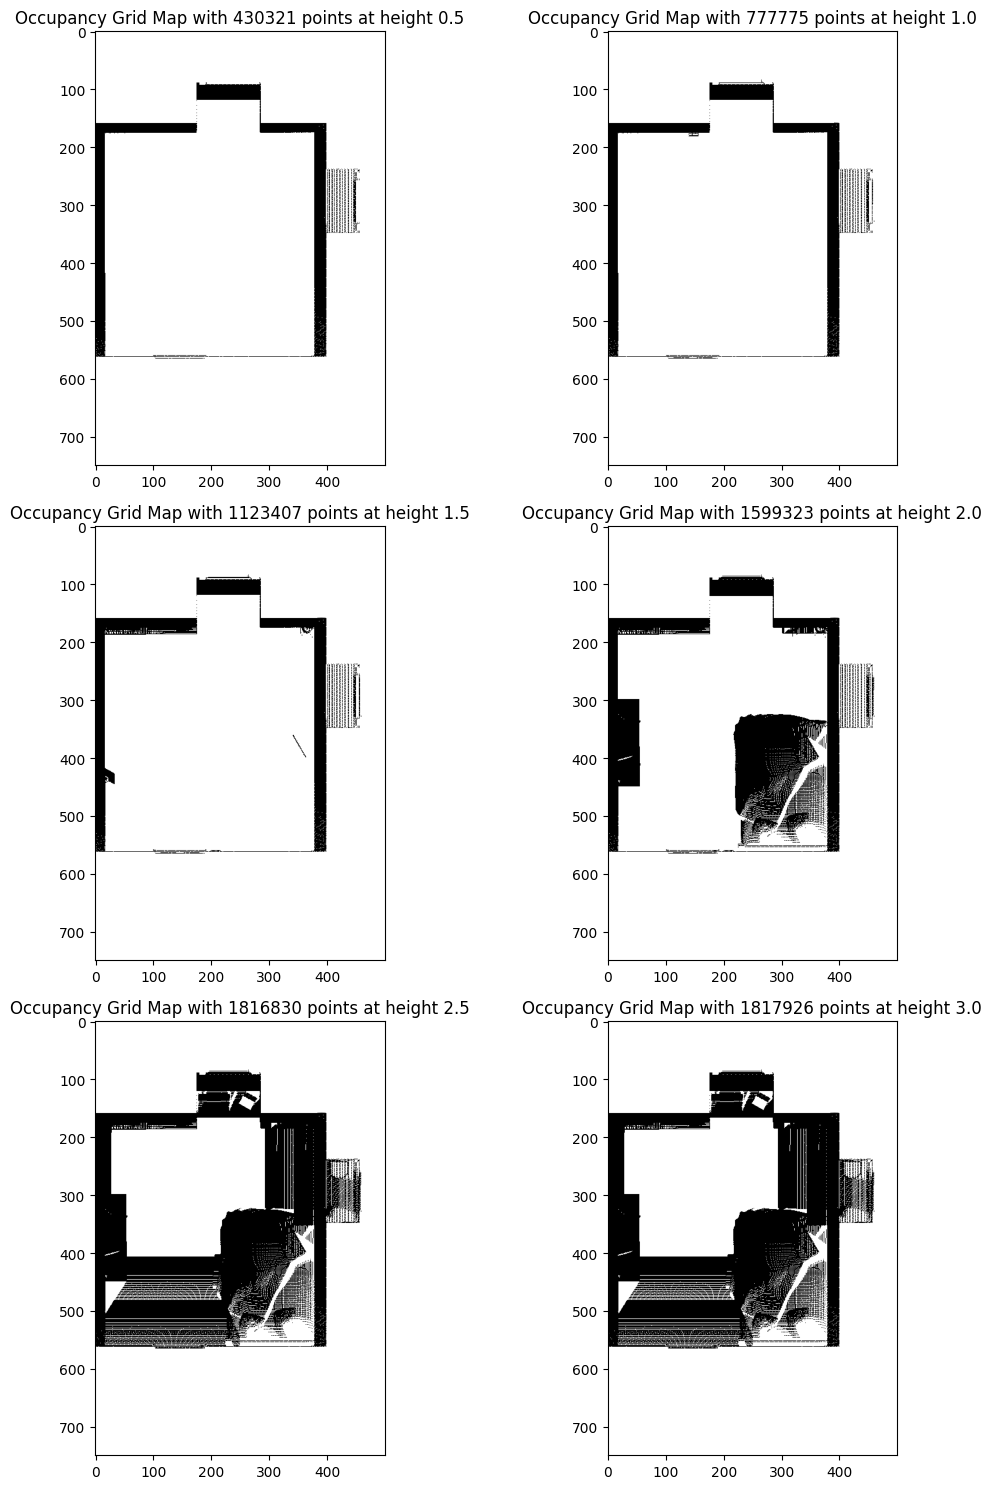

In [42]:
##############################################################################
# TODO: Do tasks described in 2.6
##############################################################################

def plot_occupancy_grid_map(points, h, ax=None, resolution=0.01):
    # Indices where z coordinate is postive and less than h
    pt_indices = np.where((points[:, 2] > 0) & (points[:, 2] < h))[0]
    occupying_pts = points[pt_indices]

    if len(occupying_pts) == 0:
        occupancy_grid = np.ones((100, 100))

    else:
        x_min = np.min(occupying_pts[:, 0])
        x_max = np.max(occupying_pts[:, 0])

        y_min = np.min(occupying_pts[:, 1])
        y_max = np.max(occupying_pts[:, 1])

        x_points = occupying_pts[:, 0]
        y_points = occupying_pts[:, 1]

        x_points = np.round((x_points - x_min) / resolution)
        y_points = np.round((y_points - y_min) / resolution)
        occupancy_grid = np.ones((int(np.round((y_max - y_min + 1) / resolution)), int(np.round((x_max - x_min + 1) / resolution))))

        for i in range(len(x_points)):
            occupancy_grid[int(y_points[i]), int(x_points[i])] = 0

        occupancy_grid = occupancy_grid[1750:2500, :500]

    if ax is None:
        plt.figure()
        plt.imshow(occupancy_grid, cmap='gray')
        plt.title(f'Occupancy Grid Map with {len(occupying_pts)} points at height {h}')
        plt.show()

    else:
        ax.imshow(occupancy_grid, cmap='gray')
        ax.set_title(f'Occupancy Grid Map with {len(occupying_pts)} points at height {h}')

points = np.asarray(final_point_cloud.points)

h_min = np.min(points[:, 2])
h_max = np.max(points[:, 2])

h_min = int(np.round(h_min - 1))
h_max = int(np.round(h_max + 1))

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

for i in range(1, 7):
    plot_occupancy_grid_map(points, i / 2, axs[int((i - 1) / 2), (i - 1) % 2], 0.01)
fig.tight_layout()
plt.show()

##############################################################################
# END OF YOUR CODE
##############################################################################

### (OPTIONAL) SECTION 3: Mapping using 3D LiDAR
This question is similar to section 2 but with LiDAR point cloud.

Your task is to fuse image data from a camera with the measurements from a LiDAR (a laser scanner with a 360° field-of-view that records distance measurements) and associate every point in the image with accurate distance measurements. 

The LiDAR’s frame is defined such that its X-axis points forward, its Y-axis points to the left, and its Z-axis points upwards. And the camera’s frame is defined such that its Z-axis points forward, X-axis points to the right, and Y-axis points downwards. The camera’s center is 8 cm below, 6 cm to the left, and 27 cm in front of the LiDAR’s center (found via extrinsic calibration and as measured by the LiDAR). Both the sensors are positioned such that the camera’s Z-axis and the LiDAR’s X-axis are perfectly parallel. Refer to the figure below for more details. 

<img src="misc/lidar.png" alt="drawing" width="500"/>

A LiDAR frame and its corresponding camera image have been provided as data/lidar-points.bin and data/image.png, respectively. The camera calibration matrix, K, is provided inside data/K.txt.

Code for loading the LiDAR points in Python is provided.

In [16]:
def load_velodyne_points(points_path):
    points = np.fromfile(points_path, dtype=np.float32).reshape(-1, 4)
    points = points[:,:3]                # exclude reflectance values, becomes [X Y Z]
    points = points[1::5,:]              # remove every 5th point for display speed (optional)
    points = points[(points[:,0] > 5)]   # remove all points behind image plane (approximate)
    return points

3.1 Compute the transformation (R, t) required to transform points in the LiDAR’s frame to the
camera’s frame. Give the transformation in both 
(a) homogeneous matrix form
(b) XYZ Euler angles (RPY)-translation form.

In [17]:
##############################################################################
# TODO: Do tasks described in 3.1
##############################################################################

# Replace "pass" statement with your code
pass

##############################################################################
# END OF YOUR CODE
##############################################################################

3.2 Then, using this computed transformation and the provided camera calibration matrix, project the LiDAR’s points onto the image plane. Use the color code (colormap) to correspond the depth of the points in the image (color is optional, but it helps in debugging). Use matplotlib or any equivalent library for plotting the points on the image. Visualize the image in this notebook. 

In [18]:
##############################################################################
# TODO: Do tasks described in 3.2
##############################################################################

# Replace "pass" statement with your code
pass

##############################################################################
# END OF YOUR CODE
##############################################################################